# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency


# Visualizations

In [8]:
# Loading the Dataset
data = pd.read_excel('Usman_data.xlsx')

# Cleaning up the column names
data.columns = ['Group', 'No_of_Seeds', 'Germination_Percentage', 'Shoot_Length', 'Root_Length', 'Fresh_weight', 'Dry_Weight']

# Converting the columns to numeric, errors='coerce' will replace non-convertible values with NaN
data['Shoot_Length'] = pd.to_numeric(data['Shoot_Length'], errors='coerce')
data['Root_Length'] = pd.to_numeric(data['Root_Length'], errors='coerce')
data['Fresh_weight'] = pd.to_numeric(data['Fresh_weight'], errors='coerce')
data['Dry_Weight'] = pd.to_numeric(data['Dry_Weight'], errors='coerce')

# Check for and drop any rows with NaN values that resulted from conversion
data.dropna(subset=['Shoot_Length', 'Root_Length', 'Fresh_weight', 'Dry_Weight'], inplace=True)

### Histogram for each Variable

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

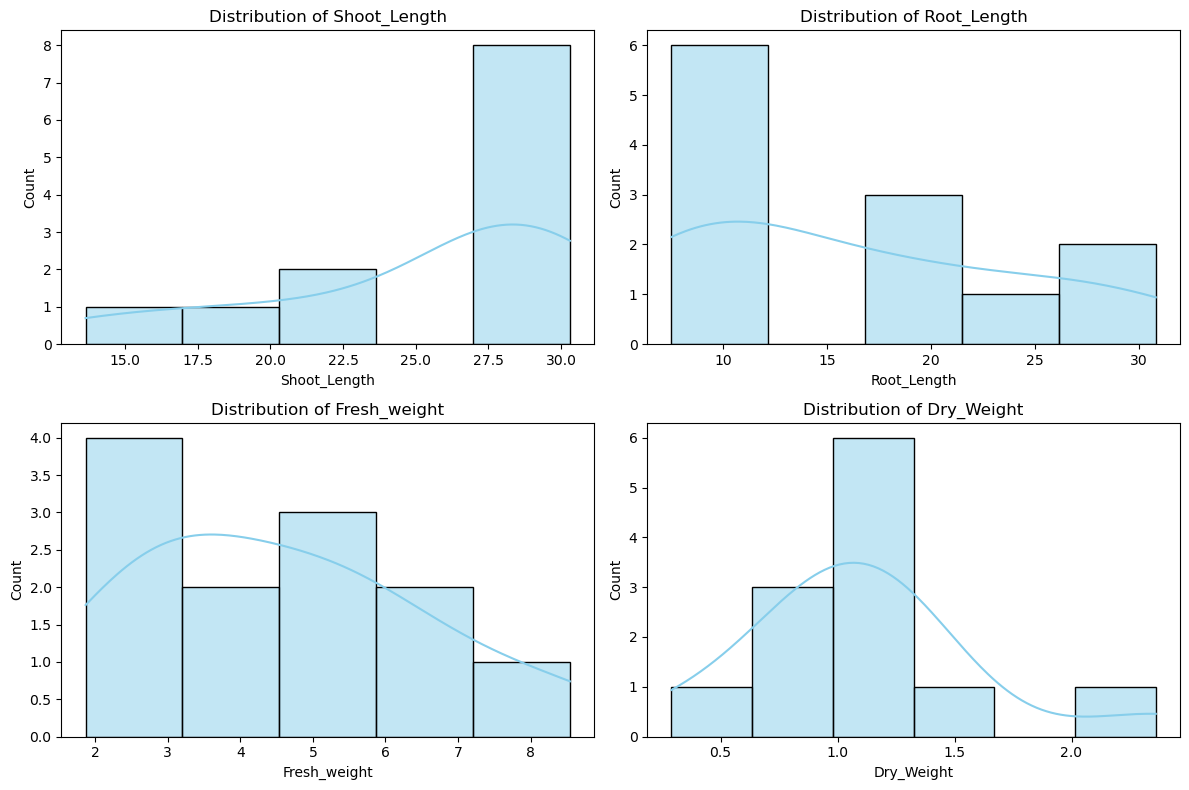

In [7]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(['Shoot_Length', 'Root_Length', 'Fresh_weight', 'Dry_Weight'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

### Box plots for each measurement by group

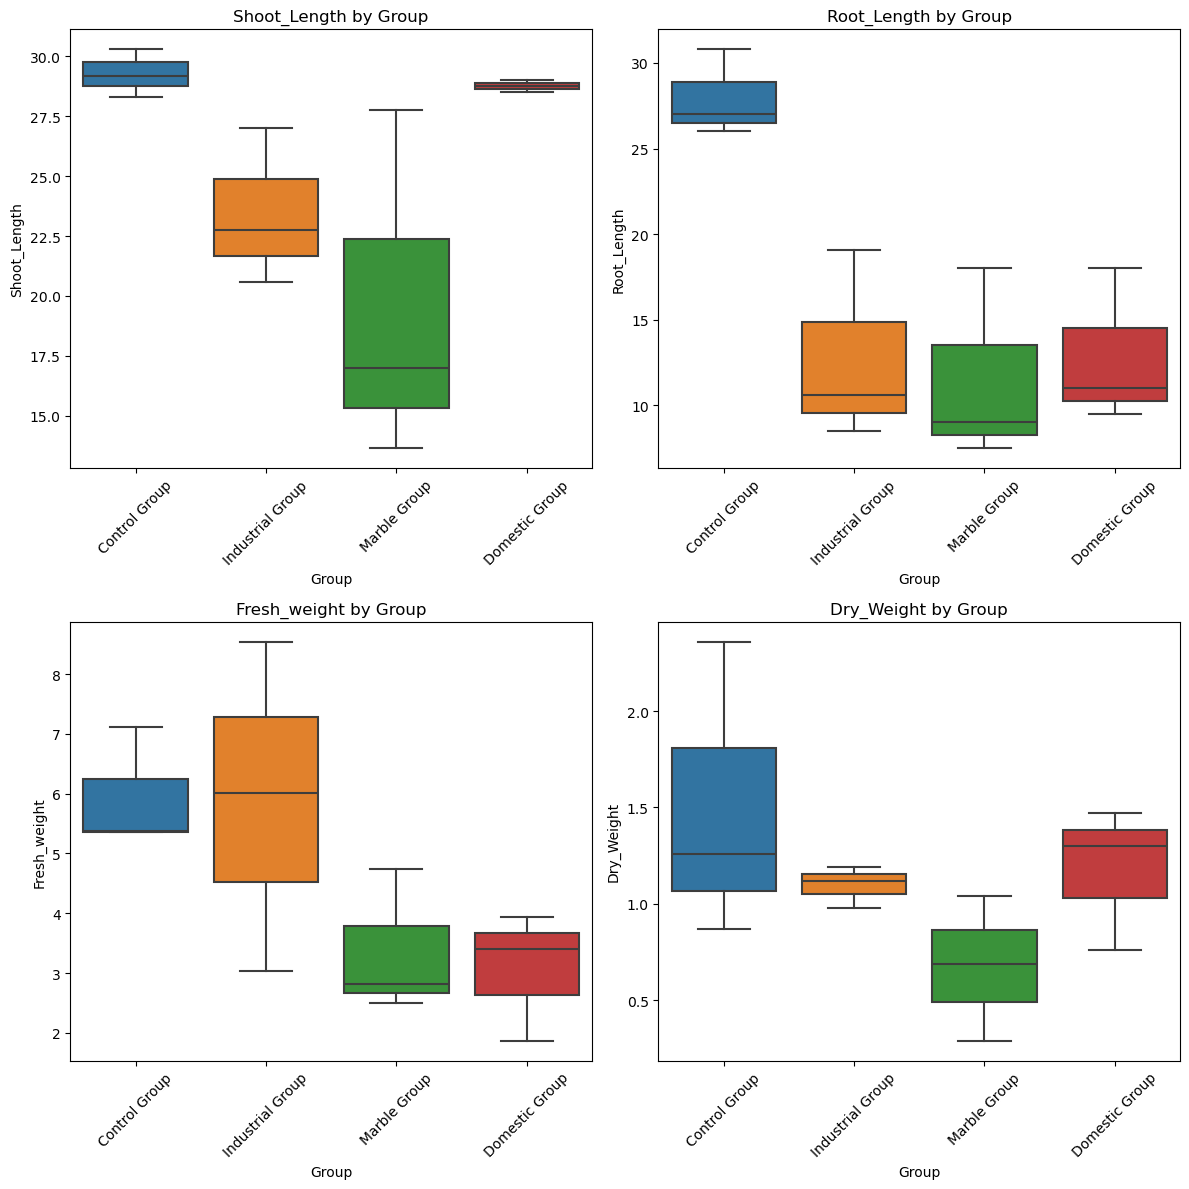

In [4]:
plt.figure(figsize=(12, 12))
for i, column in enumerate(['Shoot_Length', 'Root_Length', 'Fresh_weight', 'Dry_Weight'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Group', y=column, data=data)
    plt.xticks(rotation=45)
    plt.title(f'{column} by Group')
plt.tight_layout()
plt.show()

### Scatter plot to examine relationships between shoot and root length

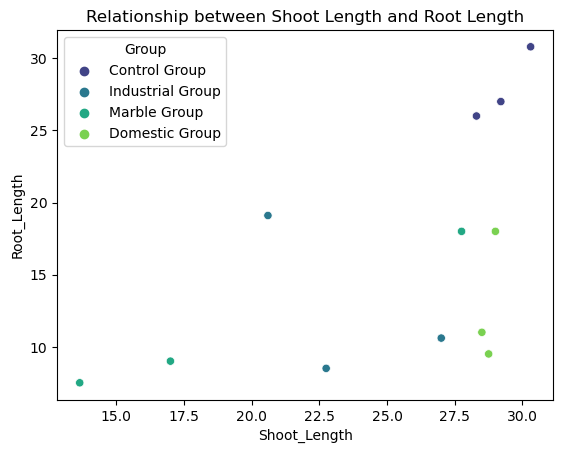

In [5]:
sns.scatterplot(x='Shoot_Length', y='Root_Length', hue='Group', data=data, palette='viridis')
plt.title('Relationship between Shoot Length and Root Length')
plt.show()

# Descriptive Statistics

In [9]:
# Calculating the descriptive statistics for each group
descriptive_stats = data.groupby('Group')[['Shoot_Length', 'Root_Length', 'Fresh_weight', 'Dry_Weight']].describe().T

print(descriptive_stats)


Group               Control Group  Domestic Group  Industrial Group  \
Shoot_Length count       3.000000        3.000000          3.000000   
             mean       29.266667       28.750000         23.450000   
             std         1.001665        0.250000          3.256916   
             min        28.300000       28.500000         20.600000   
             25%        28.750000       28.625000         21.675000   
             50%        29.200000       28.750000         22.750000   
             75%        29.750000       28.875000         24.875000   
             max        30.300000       29.000000         27.000000   
Root_Length  count       3.000000        3.000000          3.000000   
             mean       27.933333       12.833333         12.733333   
             std         2.532456        4.536886          5.612783   
             min        26.000000        9.500000          8.500000   
             25%        26.500000       10.250000          9.550000   
      

# ANOVA

In [10]:
# Performing ANOVA for each growth parameter
parameters = ['Shoot_Length', 'Root_Length', 'Fresh_weight', 'Dry_Weight']
anova_results = {}

for param in parameters:
    groups = data.groupby('Group')[param].apply(list)
    f_val, p_val = f_oneway(*groups)
    anova_results[param] = {'F-Statistic': f_val, 'p-Value': p_val}

# Display the results
for param, results in anova_results.items():
    print(f'ANOVA results for {param}: F-Statistic = {results["F-Statistic"]}, p-Value = {results["p-Value"]}')


ANOVA results for Shoot_Length: F-Statistic = 3.94724093335187, p-Value = 0.053467397401914744
ANOVA results for Root_Length: F-Statistic = 8.070670339761243, p-Value = 0.00837829043566536
ANOVA results for Fresh_weight: F-Statistic = 2.602982105189109, p-Value = 0.12421591662622597
ANOVA results for Dry_Weight: F-Statistic = 1.5554093677167131, p-Value = 0.27406477336645807


# Tukey's HSD  Test

In [11]:
# Performing Tukey's HSD test for each parameter where ANOVA is significant
parameters = ['Shoot_Length', 'Root_Length', 'Fresh_weight', 'Dry_Weight']
significant_params = []

# Checking for ANOVA significance first
for param in parameters:
    groups = data.groupby('Group')[param].apply(list)
    f_val, p_val = f_oneway(*groups)
    if p_val < 0.05:
        significant_params.append(param)

# Applying Tukey's HSD for each significant parameter
tukey_results = {}
for param in significant_params:
    mc = pairwise_tukeyhsd(endog=data[param], groups=data['Group'], alpha=0.05)
    tukey_results[param] = mc.summary()
    print(f'Tukey HSD results for {param}:\n', mc.summary())

# Optional: Converting Tukey's results to a dataframe and display
for param, result in tukey_results.items():
    print(f'Results for {param}:')
    print(result)


Tukey HSD results for Root_Length:
            Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
   Control Group   Domestic Group    -15.1 0.0195 -27.5542 -2.6458   True
   Control Group Industrial Group    -15.2 0.0188 -27.6542 -2.7458   True
   Control Group     Marble Group -16.4333 0.0123 -28.8876 -3.9791   True
  Domestic Group Industrial Group     -0.1    1.0 -12.5542 12.3542  False
  Domestic Group     Marble Group  -1.3333 0.9851 -13.7876 11.1209  False
Industrial Group     Marble Group  -1.2333 0.9881 -13.6876 11.2209  False
-------------------------------------------------------------------------
Results for Root_Length:
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
---------------------------------------------------

# Chi-Squarem Test

In [12]:
# Defining a threshold for high vs low germination
threshold = 75
data['Germination_Category'] = data['Germination_Percentage'].apply(lambda x: 'High' if x > threshold else 'Low')

# Creating a contingency table
contingency_table = pd.crosstab(data['Group'], data['Germination_Category'])

print("Contingency Table:")
print(contingency_table)

# Performing the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"p-value: {p}")
print("Expected Frequencies:")
print(expected)


Contingency Table:
Germination_Category  High  Low
Group                          
Control Group            3    0
Domestic Group           0    3
Industrial Group         2    1
Marble Group             0    3

Chi-Square Test Results:
Chi-Square Statistic: 9.257142857142858
Degrees of Freedom: 3
p-value: 0.02606037115462933
Expected Frequencies:
[[1.25 1.75]
 [1.25 1.75]
 [1.25 1.75]
 [1.25 1.75]]


# Correlation Matrix

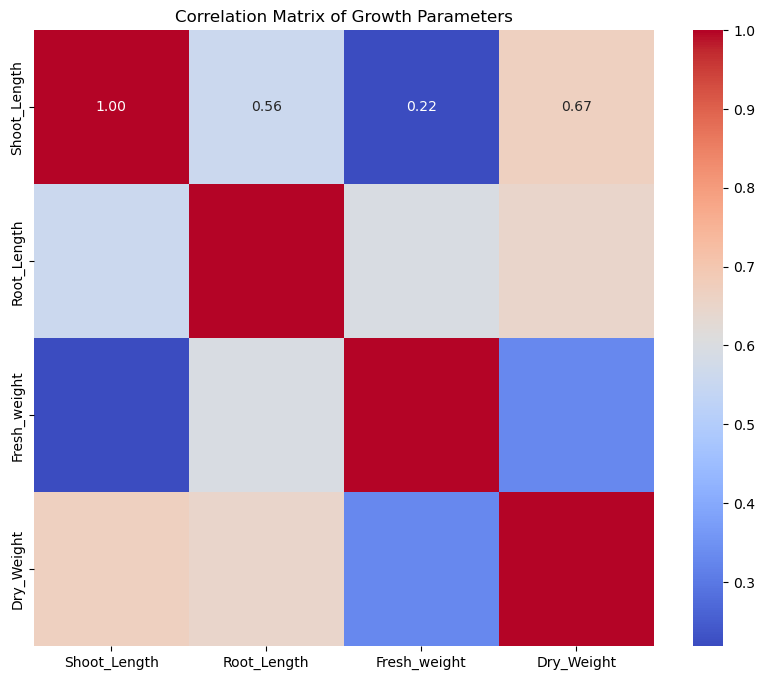

In [13]:
# Selecting the columns to analyze
analysis_columns = ['Shoot_Length', 'Root_Length', 'Fresh_weight', 'Dry_Weight']

# Calculating the correlation matrix
correlation_matrix = data[analysis_columns].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Growth Parameters')
plt.show()
